In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df = sns.load_dataset("tips")

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop("tip", axis=1), df["tip"], test_size=0.2, random_state=42, shuffle=True
)

In [12]:
x_train = x_train.reset_index().drop("index", axis=1)
x_test = x_test.reset_index().drop(
    "index",
    axis=1,
)

In [45]:
# plt.style.available

In [122]:
font_dict = {
    "family": "SF Pro Rounded",
    "color": "white",
    "weight": "bold",
    "size": 12,
}

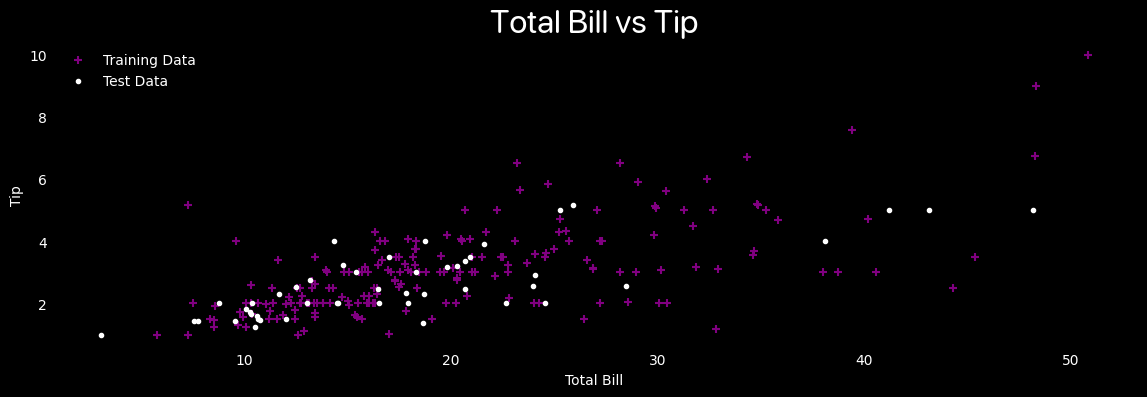

In [75]:
plt.figure(figsize=(14, 4))
plt.style.use("dark_background")
plt.scatter(
    x_train["total_bill"], y_train, label="Training Data", color="purple", marker="+"
)
plt.scatter(x_test["total_bill"], y_test, label="Test Data", color="white", marker=".")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.title("Total Bill vs Tip", fontdict=font_dict)
plt.grid()
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(x_train[["total_bill"]], y_train)
print(lr.score(x_test[["total_bill"]], y_test))
print(lr.coef_)
print(lr.intercept_)

0.5449381659234664
[0.10696371]
0.925235558557056


In [82]:
custom_equation = f"y = {lr.coef_[0]:.2f}x + {lr.intercept_:.2f}"
print(custom_equation)

y = 0.11x + 0.93


In [119]:
custom_predictions = 0.17 * x_train["total_bill"] + 0.93

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(x_train[["total_bill"]])
poly_x_test = poly.fit_transform(x_test[["total_bill"]])
poly_lr = LinearRegression()
poly_model = poly_lr.fit(poly_x_train, y_train)
print(poly_lr.score(poly_x_test, y_test))
print(poly_lr.coef_)
print(poly_lr.intercept_)

0.5300165292317491
[0.         0.08779673 0.00038448]
1.1261649474742221


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

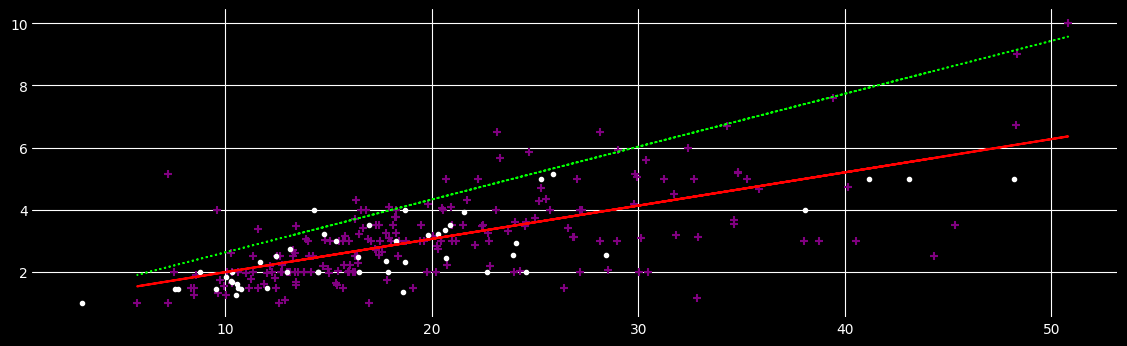

In [130]:
# Plotting the regression line
plt.figure(figsize=(14, 4))
plt.style.use("dark_background")
plt.scatter(
    x_train["total_bill"], y_train, label="Training Data", color="purple", marker="+"
)
plt.scatter(x_test["total_bill"], y_test, label="Test Data", color="white", marker=".")
plt.plot(
    x_train["total_bill"],
    model.predict(x_train[["total_bill"]]),
    color="red",
    label="Main Regression Line",
)
plt.plot(
    x_train["total_bill"],
    custom_predictions,
    color="lime",
    label="Custom Regression Line",
    linestyle="dotted",
    linewidth=1.3,
)

plt.plot(
    poly_x_train["total_bill"],
    poly_model.predict(poly_x_train[["total_bill"]]),
    color="white",
    label="Polynomial Regression Line",
)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.title(
    "Comparison of Regression Lines With Training and Test Sets", fontdict=font_dict
)
plt.grid()
plt.show()

In [161]:
# Reshape the data to fit the model
X_train = x_train["total_bill"].values.reshape(-1, 1)
X_test = x_test["total_bill"].values.reshape(-1, 1)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Transform features for polynomial regression
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Generate a range of values for plotting the regression lines
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Predict values using both models
y_linear_pred = linear_model.predict(x_range)
y_poly_pred = poly_model.predict(poly.transform(x_range))

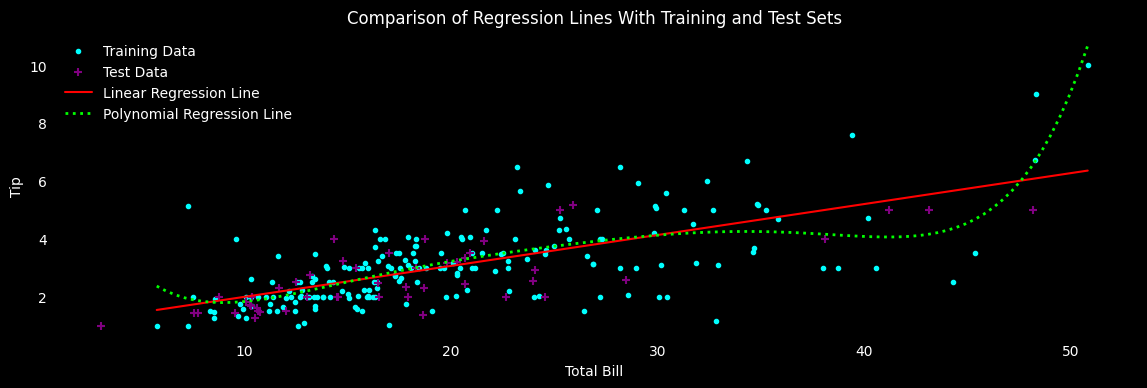

In [156]:
# Plotting
plt.figure(figsize=(14, 4))
plt.style.use("dark_background")
plt.scatter(
    x_train["total_bill"], y_train, label="Training Data", color="cyan", marker="."
)
plt.scatter(x_test["total_bill"], y_test, label="Test Data", color="purple", marker="+")
plt.plot(x_range, y_linear_pred, label="Linear Regression Line", color="red")
plt.plot(
    x_range,
    y_poly_pred,
    label="Polynomial Regression Line",
    color="lime",
    linestyle="dotted",
    linewidth=2,
)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.title("Comparison of Regression Lines With Training and Test Sets")
plt.grid(False)
plt.show()

Animation saved as polynomial_animation.gif


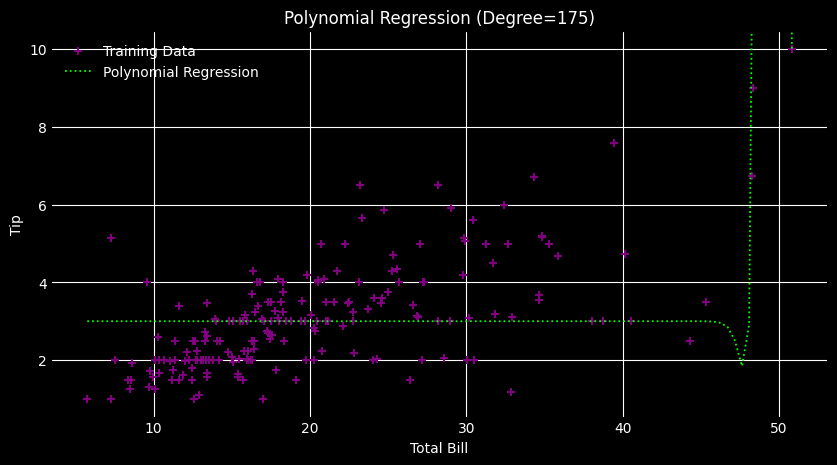

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data (Assuming x_train, y_train are defined)
X_train = x_train["total_bill"].values.reshape(-1, 1)
y_train = y_train

# Generate x values for plotting
x_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.style.use("dark_background")
ax.scatter(X_train, y_train, label="Training Data", color="purple", marker="+")
(line,) = ax.plot(
    [],
    [],
    color="lime",
    linestyle="dotted",
    linewidth=1.3,
    label="Polynomial Regression",
)


# Animation function
def update(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_poly_pred = poly_model.predict(poly.transform(x_range))

    line.set_data(x_range, y_poly_pred)
    ax.set_title(f"Polynomial Regression (Degree={degree})")
    return (line,)


# Create the animation
ani = FuncAnimation(fig, update, frames=range(1, 176), interval=100, blit=True)

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.grid(True)

# Save the animation as a GIF
ani.save("polynomial_animation.gif", writer=PillowWriter(fps=10))
print("Animation saved as polynomial_animation.gif")
# plt.show()